In [1]:
import h5py, os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.misc import imresize
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

from hangul.read_data import load_data
from hangul.label_mapping import imf2idx
from hangul.style import title_fontsize

In [2]:
bf = '/storage/hangul/h5s'

In [3]:
# load GothicA1-Regular
image1, _, _, _, _ = load_data(os.path.join(bf, 'GothicA1-Regular/GothicA1-Regular_500.h5'), median_shape=True)
image2, _, _, _, _ = load_data(os.path.join(bf, 'NanumMyeongjo/NanumMyeongjo_500.h5'), median_shape=True)
image3, _, _, _, _ = load_data(os.path.join(bf, 'NanumPen/NanumPen_500.h5'), median_shape=True)

0.0031249999999999997 0.06666666666666667



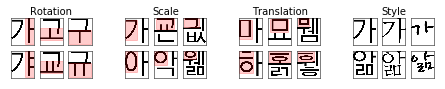

In [9]:
figsize = (6, 1)
fig = plt.figure(figsize=figsize)

le = .005
re = .005
be = .01
te = .15

vg = .075
h = (1. - te - be - vg) / 2.
w = h * figsize[1] / figsize[0]

shg = (vg * figsize[1] / figsize[0]) / 4.
lhg = (1. - le - re - 12.*w - 8.*shg) / 3.
bw = 3.*w + 2.*shg + lhg
print(shg, lhg)
print()

axes = np.zeros((4, 2, 3), dtype=object)

for gg in range(4):
    for rr in range(2):
        for cc in range(3):
            axes[gg, rr, cc] = fig.add_axes([le + bw*gg + (w + shg)*cc,
                                             be + (1. - rr)*(h + vg),
                                             w, h])

origins = [(250,0), (0,180), (0,210),
           (250,0), (0,180), (0,210)]
rects = [(150,450), (400,210), (400,240),
         (150,450), (400,210), (400,240)]
indices = [0,8,13,
           2,12,17]
idx = 0
for rr in range(2):
    for cc in range(3):
        ax = axes[0, rr, cc]
        imf_idx = imf2idx(0, indices[idx], 0)
        ax.imshow(image1[imf_idx], cmap='gray_r')
        rect = Rectangle((origins[idx][0], origins[idx][1]), rects[idx][0], rects[idx][1],
                         alpha=0.2, color='red')
        ax.add_patch(rect)
        idx += 1
        
origins = [(0,30), (40,10), (30,10),
           (0,10), (0,10), (20,0)]
rects = [(220,360), (320,180), (250,150),
         (220,360), (230,230), (210,140)]
indices = [0,340,550,
           6468,6469,6898]
idx = 0
for rr in range(2):
    for cc in range(3):
        ax = axes[1, rr, cc]
        ax.imshow(image1[indices[idx]], cmap='gray_r')
        rect = Rectangle((origins[idx][0], origins[idx][1]), rects[idx][0], rects[idx][1],
                         alpha=0.2, color='red')
        ax.add_patch(rect)
        idx += 1

origins = [(0,30), (40,20), (20,10),
           (0,10), (20,0), (20,0)]
rects = [(220,340), (320,230), (200,140),
         (250,380), (360,200), (280,180)]
indices = [3528,3864,3964,
           10584,10817,11059]
idx = 0
for rr in range(2):
    for cc in range(3):
        ax = axes[2, rr, cc]
        ax.imshow(image1[indices[idx]], cmap='gray_r')
        rect = Rectangle((origins[idx][0], origins[idx][1]), rects[idx][0], rects[idx][1],
                         alpha=0.2, color='red')
        ax.add_patch(rect)
        idx += 1

indices = [0, 6478]
imgs = [image1, image2, image3]
for cc in range(3):
    rr = 0
    ax = axes[3, rr, cc]
    img = imgs[cc]
    ax.imshow(img[indices[rr]], cmap='gray_r')
    rr = 1
    ax = axes[3, rr, cc]
    img = imgs[cc]
    ax.imshow(img[indices[rr]], cmap='gray_r')


axes[0, 0, 1].set_title('Rotation', size=title_fontsize, pad=3)
axes[1, 0, 1].set_title('Scale', size=title_fontsize, pad=3)
axes[2, 0, 1].set_title('Translation', size=title_fontsize, pad=3)
axes[3, 0, 1].set_title('Style', size=title_fontsize, pad=3)
for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(0.5)

plt.savefig('composition.png', dpi=300)
plt.savefig('composition.pdf', dpi=300)